In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime as dt
import math
from sympy import Symbol, solveset, Interval
import numpy as np

from quant_functions import anal_funcs, data_funcs

# 시각화 관련
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
## cf.getThemes()
cf.set_config_file(theme='polar')
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
## plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,6)

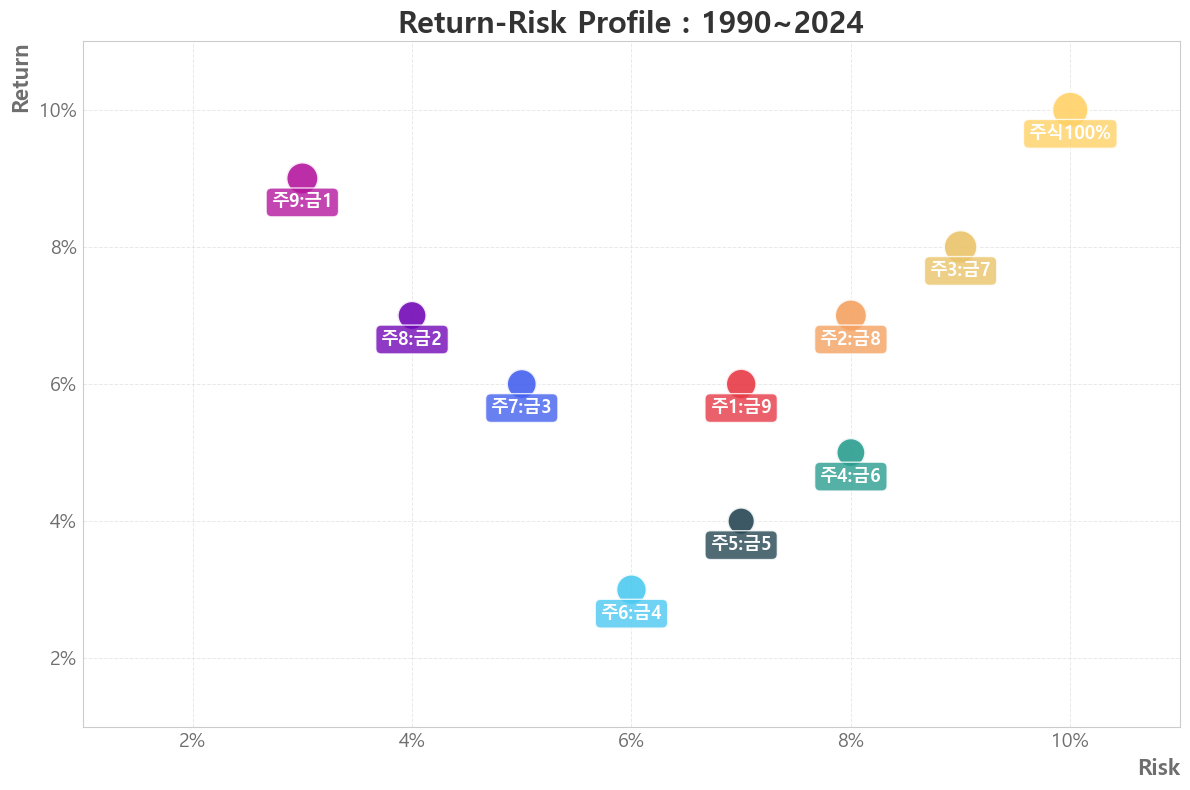

In [49]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 데이터
x = [7, 8, 9, 8, 7, 6, 5, 4, 3, 10]
y = [6, 7, 8, 5, 4, 3, 6, 7, 9, 10]
labels = ["주1:금9", "주2:금8", "주3:금7", "주4:금6", "주5:금5", "주6:금4", "주7:금3", "주8:금2", "주9:금1", "주식100%"]

# 색상 및 크기 설정
colors = ["#E63946", "#F4A261", "#E9C46A", "#2A9D8F", "#264653", "#4CC9F0", "#4361EE", "#7209B7", "#B5179E", "#FFD166"]
sizes = [500, 550, 600, 450, 400, 500, 480, 450, 550, 700]

# 그래프 설정
fig, ax = plt.subplots(figsize=(12, 8))

# 점 그리기
scatter = ax.scatter(x, y, c=colors, s=sizes, edgecolors="white", linewidth=2, alpha=0.9)


# 데이터 레이블 추가
for i, label in enumerate(labels):
    plt.text(
        x[i], y[i]-0.35, label, fontsize=13, ha="center", va="center", 
        color="white", fontweight="bold", bbox=dict(facecolor=colors[i], alpha=0.8, boxstyle="round,pad=0.3")
    )


# % 단위를 추가하는 포맷터 함수 정의
def percent_formatter(x, pos):
    return f"{int(x)}%"

# X축, Y축에 % 포맷터 적용
plt.gca().xaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
# 눈금과 축 간격 줄이기
plt.gca().tick_params(axis="x", pad=1)  # X축 눈금 패딩 조정
plt.gca().tick_params(axis="y", pad=1)  # Y축 눈금 패딩 조정

# 축 설정
plt.title("Return-Risk Profile : 1990~2024", fontsize=22, fontweight="bold", color="#333333")
plt.xlabel("Risk", fontsize=16, labelpad=5, fontweight="bold", color="#6E6E6E", loc="right")
plt.ylabel("Return", fontsize=16, labelpad=5, fontweight="bold", color="#6E6E6E", loc="top")
plt.xticks(fontsize=14, color="#6E6E6E")
plt.yticks(fontsize=14, color="#6E6E6E")
plt.xlim(1, 11)
plt.ylim(1, 11)
plt.grid(color="#E0E0E0", linestyle="--", linewidth=0.7, alpha=0.7)


# 저장 및 출력
plt.tight_layout()
## plt.savefig("return_risk_profile_vibrant.png", dpi=300)
plt.show()


In [36]:
def cal_ret(k, s, c, t):
    '''
    * k: 목표 자산, s: 시드 머니, c: 현금 흐름, t: 투자 기간
    * r: 목표수익률
    '''
    r=Symbol('r')
    equation = s*((1+r)**(t)) + c*((1-((1+r)**(t)))/(1-(1+r))) - k
    val = solveset(equation, r, Interval(0, 999))
    try:
        solve_r = float(list(val)[0])
        ret = (np.round(solve_r, 6))*100
    except:
        ret = 0
    return ret

##### 목표 수익률

In [90]:
s = 0
k_ls = [10000*1e4, 30000*1e4, 50000*1e4, 100000*1e4]
t_ls = [3, 5, 8, 12]
c_ls = [100*12*1e4, 150*12*1e4, 200*12*1e4, 250*12*1e4]

results = []
idxs = []
for k in k_ls:
    for t in t_ls:
        for c in c_ls:
            idxs.append((k, s, c, t))
            ## print((k, s, c, t))
            result = cal_ret(k, s, c, t)
            results.append(result)

In [91]:
target_rets = pd.DataFrame(idxs, columns=['목표 자산', '초기 자산', '현금 흐름', '투자 기간']).astype(int)
target_rets['현금 흐름'] = target_rets['현금 흐름']//12
target_rets[['목표 자산', '현금 흐름']] = (target_rets[['목표 자산', '현금 흐름']]//1e4).astype(int)
target_rets['목표 수익률'] = results
target_rets['목표 수익률'] = target_rets['목표 수익률'].round(2)
target_rets = target_rets[['목표 자산', '투자 기간', '현금 흐름', '목표 수익률']]

In [93]:
target_rets[(target_rets['목표 수익률'] <= 25)&(target_rets['목표 수익률'] >= 4)]

,목표 자산,투자 기간,현금 흐름,목표 수익률
3,10000,3,250,10.73
5,10000,5,150,5.27
25,30000,8,150,20.27
26,30000,8,200,12.44
27,30000,8,250,6.29
28,30000,12,100,12.58
29,30000,12,150,5.79
43,50000,8,250,20.27
44,50000,12,100,20.82
45,50000,12,150,14.30


In [40]:
pd.DataFrame(results)

,0
0,551.7834
1,342.4429
2,248.9570
3,192.7827
4,131.7770
5,86.6745
6,62.9658
7,47.0997
8,33.2232
9,19.2375
